In [2]:
# Import all the important library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
#This function maps the probability values (Propensity) calculated by the models with the Corresponding Dataframe
def map_score(dataframe,customers,prob):
    dataframe['Propensity'] = 0
    for i in range(len(dataframe)):
        idx = dataframe.index[i]
        for j in range(len(customers)):
            if dataframe.loc[idx,'Client'] == customers[j]:
                dataframe.loc[idx, "Propensity"] = prob[j]

In [4]:
df_BoA_bank = pd.read_csv("C:/Users/me/Desktop/Dataset.csv")

In [5]:
df_BoA_bank.head()

,Client,Sex,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,...,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,1,F,51,7,1,0,0,1,0,0,...,30.0,3.0,12.0,9.0,1.0,0.0,0.0,26.972679,0.0,0.0
1,2,M,43,152,1,1,0,0,0,0,...,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,M,17,140,1,0,1,0,0,0,...,3.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,M,24,153,1,1,0,0,1,0,...,36.0,6.0,12.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,F,58,200,1,1,0,0,0,0,...,41.0,4.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
cust_req = pd.DataFrame({'Category': {0: 'Credit', 1: 'Loan',2:'Mutual Fund'}, 'Sum': {0: float(df_BoA_bank[["Sale_CC"]].sum()),
1:float(df_BoA_bank[["Sale_CL"]].sum()),2:float(df_BoA_bank[["Sale_MF"]].sum()) }})

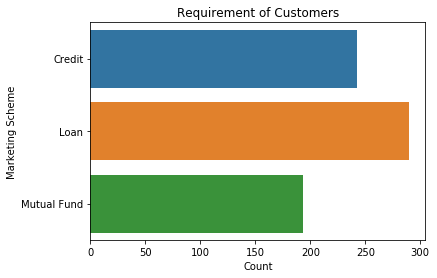

In [8]:
sns.barplot(x = 'Sum', y = 'Category', data = cust_req)
plt.title('Requirement of Customers')
plt.xlabel('Count')
plt.ylabel('Marketing Scheme')
plt.show()

In [9]:
df_BoA_bank = df_BoA_bank.dropna()
corr = df_BoA_bank.corr()
corr.sort_values(["Sale_CL"], ascending = False, inplace = True)
print(corr.Sale_CL)

Sale_CL                         1.000000
Revenue_CL                      0.709623
Tenure                          0.182954
TransactionsCred_CA             0.084930
TransactionsCred                0.083528
Count_CA                        0.083067
TransactionsDebCash_Card        0.076641
ActBal_MF                       0.073530
TransactionsDeb                 0.068460
ActBal_OVD                      0.066445
TransactionsDeb_CA              0.064593
VolumeDeb                       0.061754
Count_CL                        0.052065
VolumeDeb_PaymentOrder          0.051462
ActBal_CL                       0.050732
TransactionsDeb_PaymentOrder    0.049147
Client                          0.044932
Count_MF                        0.044770
VolumeDeb_CA                    0.039795
VolumeDebCashless_Card          0.038015
Count_OVD                       0.035477
Count_SA                        0.028808
VolumeDebCash_Card              0.015739
TransactionsDebCashless_Card    0.014826
Revenue_MF      

In [10]:
data_loan = df_BoA_bank[['Tenure','TransactionsCred_CA','Count_CA','TransactionsCred','TransactionsDebCash_Card','ActBal_CC','Age','Client','Sale_CL','Revenue_CL']]

In [13]:
X = data_loan.loc[:,'Tenure':'Client'].values
y = data_loan.Sale_CL.values

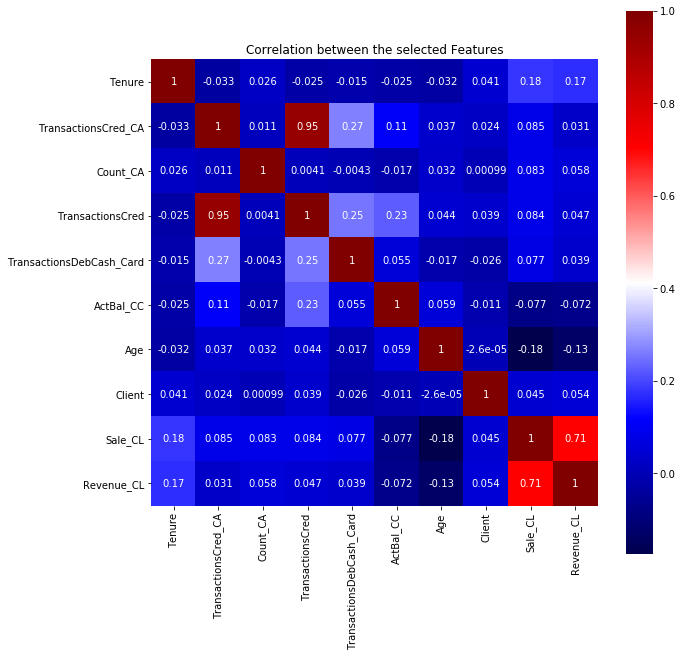

In [14]:
Corr_Loan = data_loan.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Loan, vmax=1, square=True,annot=True,cmap='seismic')

plt.title('Correlation between the selected Features')
plt.show()

In [20]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)

In [21]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression(penalty='l2',C=1,class_weight='balanced')
logistic = logistic.fit(X_train, y_train)
print("Accuracy = "+str(logistic.score(X_test,y_test)))

C:\Users\me\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy = 0.629370629371


In [22]:
pscore = logistic.predict_proba(X_test)[:,1] # The predicted propensities by the model

In [23]:
Clients = X_test[:,-1] 

In [24]:
map_score(data_loan,Clients,pscore)

C:\Users\me\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\me\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [26]:
 #Remove records where the Target sale value is 0
data_loan =data_loan[(data_loan.Sale_CL != 0)]
# Remove cases where probability is 0
data_loan = data_loan[(data_loan.Propensity != 0)]
# Remove the non essential fields 
data_loan = data_loan[['Client','Sale_CL','Revenue_CL','Propensity']]
# Sort the values by Decreasing order of Propensity, so that the clients with the highest propensity can be targeted first
Clients_loan = data_loan.sort_values(by ='Propensity',ascending=False)
# Export the results to a CSV file
Clients_loan.to_csv('Clients_loan.csv',index=False)

In [27]:
data_loan

,Client,Sale_CL,Revenue_CL,Propensity
101,102,1.0,6.952500,0.848873
119,120,1.0,7.297857,0.374877
122,123,1.0,10.461071,0.543313
191,192,1.0,6.857143,0.280950
387,388,1.0,7.285714,0.489054
414,415,1.0,27.257500,0.481609
454,455,1.0,10.571429,0.288196
469,470,1.0,10.607143,0.291578
500,501,1.0,15.952143,0.225270
514,515,1.0,13.033929,0.421091


In [28]:
#Which clients have higher propensity to buy credit card?
corr.sort_values(["Sale_CC"], ascending = False, inplace = True)
print(corr.Sale_CC)

Sale_CC                         1.000000
Revenue_CC                      0.266128
ActBal_SA                       0.178872
ActBal_CA                       0.162126
Count_SA                        0.109100
VolumeDeb_PaymentOrder          0.078926
TransactionsDebCash_Card        0.067147
Revenue_CL                      0.061286
VolumeDeb                       0.056011
VolumeDeb_CA                    0.048978
Count_OVD                       0.045900
Age                             0.044275
TransactionsCred                0.033397
Tenure                          0.015186
VolumeCred                      0.015178
TransactionsCred_CA             0.007702
TransactionsDeb                -0.000098
Revenue_MF                     -0.001863
VolumeCred_CA                  -0.002583
Client                         -0.003112
TransactionsDeb_CA             -0.009415
VolumeDebCash_Card             -0.009527
TransactionsDeb_PaymentOrder   -0.009810
Count_CC                       -0.011186
VolumeDebCashles

In [29]:
data_credit = df_BoA_bank[['ActBal_SA','ActBal_CA','Count_SA','VolumeDeb_PaymentOrder','TransactionsDebCash_Card','ActBal_CC','Count_CC','Client','Sale_CC','Revenue_CC']]

In [30]:
X = data_credit.loc[:,'ActBal_SA':'Client'].values
y = data_credit.Sale_CC.values

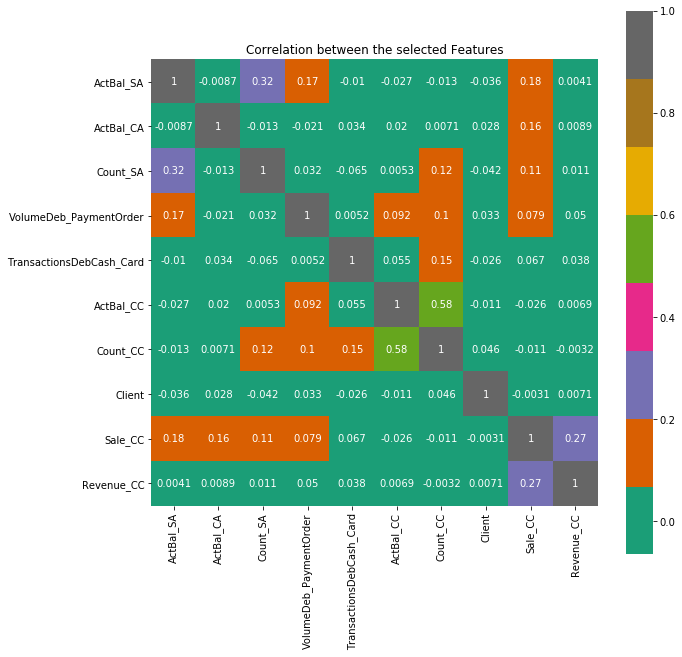

In [31]:
Corr_Credit = data_credit.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Credit, vmax=1, square=True,annot=True,cmap='Dark2')

plt.title('Correlation between the selected Features')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.783216783217


In [33]:
pscore = clf.predict_proba(X_test)[:,1]
# The list of clients to be mapped to the propensity score calculated
Clients = X_test[:,-1]

In [34]:
map_score(data_credit,Clients,pscore)

C:\Users\me\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\me\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
# Remove records where the Target sale value is 0
data_credit =data_credit[(data_credit.Sale_CC != 0)]
# Remove cases where probability is 0
data_credit = data_credit[(data_credit.Propensity != 0)]
# Remove the non essential fields 
data_credit = data_credit[['Client','Sale_CC','Revenue_CC','Propensity']]
# Sort the values by Decreasing order of Propensity, so that the clients with the highest propensity can be targeted first
Clients_credit = data_credit.sort_values(by ='Propensity',ascending=False)
# Export the results to a CSV file
Clients_credit.to_csv('Clients_credit.csv',index=False)

In [36]:
Clients_credit

,Client,Sale_CC,Revenue_CC,Propensity
1537,1538,1.0,1.714286,0.8
384,385,1.0,4.500000,0.7
1366,1367,1.0,5.177143,0.6
454,455,1.0,18.292143,0.6
648,649,1.0,3.000000,0.6
1301,1302,1.0,0.428571,0.5
414,415,1.0,16.428571,0.5
800,801,1.0,3.928571,0.5
617,618,1.0,18.571429,0.4
926,927,1.0,3.569286,0.4


In [37]:
# Which clients have higher propensity to buy mutual fund?
corr.sort_values(["Sale_MF"], ascending = False, inplace = True)
print(corr.Sale_MF)

Sale_MF                         1.000000
Revenue_MF                      0.387523
Count_MF                        0.164022
TransactionsDebCashless_Card    0.124785
TransactionsDeb                 0.082344
TransactionsCred_CA             0.081178
TransactionsCred                0.073415
TransactionsDeb_CA              0.053990
ActBal_MF                       0.024952
TransactionsDeb_PaymentOrder    0.023112
VolumeCred_CA                   0.015664
Client                          0.011345
ActBal_CC                       0.010573
Revenue_CL                      0.004459
VolumeDebCashless_Card          0.002175
Count_CA                        0.001232
ActBal_OVD                     -0.001809
TransactionsDebCash_Card       -0.002194
Count_CC                       -0.003033
VolumeCred                     -0.003425
Tenure                         -0.005661
Count_SA                       -0.006532
Count_OVD                      -0.012146
VolumeDeb_PaymentOrder         -0.012781
Sale_CL         

In [39]:
data_mutual_fund = df_BoA_bank[['Count_MF','TransactionsDebCashless_Card','TransactionsDeb','TransactionsCred_CA'             
,'TransactionsCred','TransactionsDeb_CA','ActBal_MF',
'TransactionsDeb_PaymentOrder','VolumeCred_CA','Client','Sale_MF','Revenue_MF']]

In [41]:
X = data_mutual_fund.loc[:,'Count_MF':'Client'].values
y = data_mutual_fund.Sale_MF.values



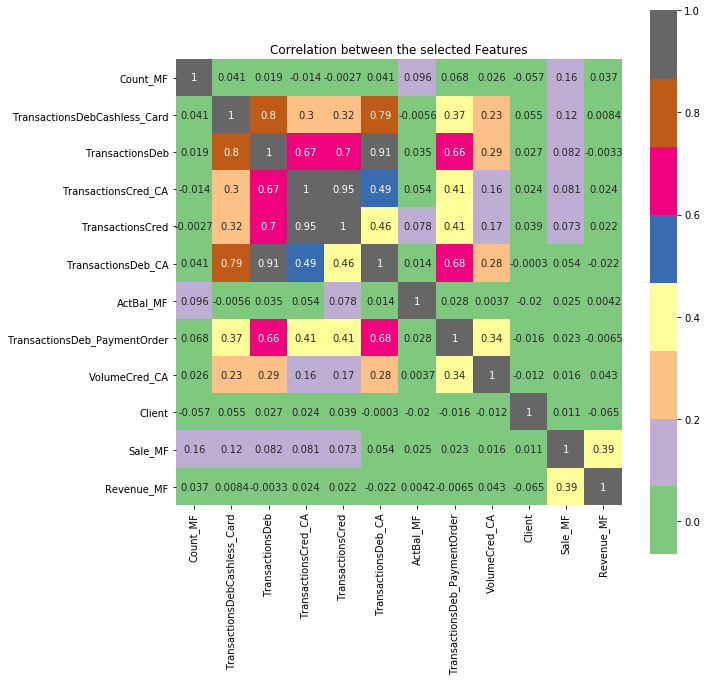

In [42]:
Corr_Mutual_Fund = data_mutual_fund.corr()
plt.figure(figsize=(10,10))
sns.heatmap(Corr_Mutual_Fund, vmax=1, square=True,annot=True,cmap='Accent')
plt.title('Correlation between the selected Features')
plt.show()


In [46]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42)
clf = GaussianNB()
clf.fit(X_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [47]:
print(clf.score(X_test,y_test))

0.713286713287


In [48]:
pscore = clf.predict_proba(X_test)[:,1]

In [49]:
Clients = X_test[:,-1]
map_score(data_mutual_fund,Clients,pscore)


C:\Users\me\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\me\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [50]:
# Remove records where the Target sale value is 0
data_mutual_fund =data_mutual_fund[(data_mutual_fund.Sale_MF != 0)]
# Remove cases where probability is 0
data_mutual_fund = data_mutual_fund[(data_mutual_fund.Propensity != 0)]
# Remove the non essential fields 
data_mutual_fund = data_mutual_fund[['Client','Sale_MF','Revenue_MF','Propensity']]
# Sort the values by Decreasing order of Propensity, so that the clients with the highest propensity can be targeted first
Clients_mutual_fund = data_mutual_fund.sort_values(by ='Propensity',ascending=False)
# Export the results to a CSV file
Clients_mutual_fund.to_csv('Clients_mutual_fund.csv',index=False)

In [51]:
Clients_mutual_fund

,Client,Sale_MF,Revenue_MF,Propensity
101,102,1.0,2.958036,1.000000e+00
1229,1230,1.0,1.547500,9.999947e-01
1495,1496,1.0,5.771250,9.998512e-01
41,42,1.0,15.275714,9.998112e-01
1316,1317,1.0,5.987679,8.966462e-01
910,911,1.0,1.269643,6.348981e-01
597,598,1.0,0.163571,6.015491e-01
1084,1085,1.0,3.763929,4.683753e-01
1391,1392,1.0,1.674643,1.275515e-01
766,767,1.0,0.686964,1.156403e-01


In [52]:
# Best Case Scenario
print("Revenue From sale of Credit Card   = " +str(data_credit.Revenue_CC.sum()))
print("Revenue From sale of Consumer Loan = " +str(data_loan.Revenue_CL.sum()))
print("Revenue From sale of Mutual Fund   = " +str(data_mutual_fund.Revenue_MF.sum()))

Revenue From sale of Credit Card   = 222.392142855
Revenue From sale of Consumer Loan = 497.757857172
Revenue From sale of Mutual Fund   = 265.494107137


In [53]:
print("Total best case Revenue = " +str(data_credit.Revenue_CC.sum() + data_loan.Revenue_CL.sum() + data_mutual_fund.Revenue_MF.sum()))

Total best case Revenue = 985.644107164


In [54]:
data_credit.rename(columns={'Revenue_CC': 'Revenue'}, inplace=True)
data_loan.rename(columns={'Revenue_CL': 'Revenue'}, inplace=True)
data_mutual_fund.rename(columns={'Revenue_MF': 'Revenue'}, inplace=True)

In [55]:
Consolidated_data = data_credit[["Client","Revenue",'Propensity']].copy()
Consolidated_data['Category'] = 'Credit'
Consolidated_data = Consolidated_data.append(data_loan)
Consolidated_data = Consolidated_data[['Category','Client','Revenue','Propensity']]
Consolidated_data = Consolidated_data.fillna('Loan')
Consolidated_data = Consolidated_data.append(data_mutual_fund)
Consolidated_data = Consolidated_data[['Category','Client','Revenue','Propensity']]
Consolidated_data = Consolidated_data.fillna('mutual_fund')

C:\Users\me\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [56]:
Consolidated_data['Category'].value_counts()

Loan           44
mutual_fund    33
Credit         25
Name: Category, dtype: int64

C:\Users\me\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


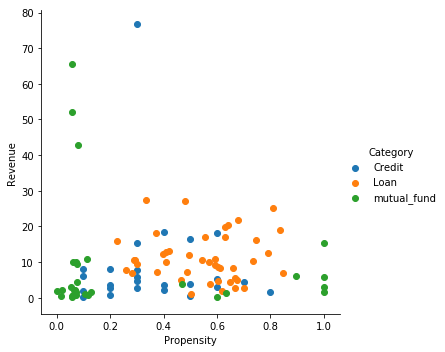

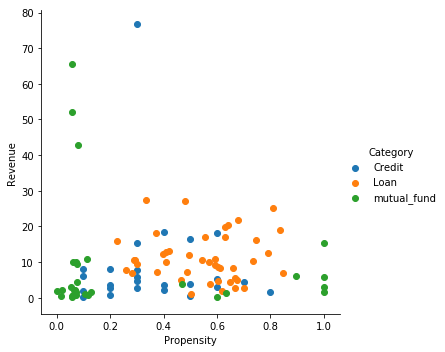

In [58]:
# Visualizing the results
sns.FacetGrid(Consolidated_data, hue="Category", size=5) \
   .map(plt.scatter, "Propensity", "Revenue") \
   .add_legend()
plt.show()

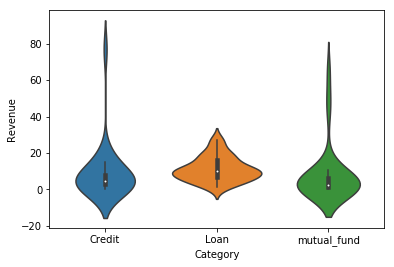

In [59]:
sns.violinplot(x="Category", y="Revenue", data=Consolidated_data, size=6)
plt.show()

C:\Users\me\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\me\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


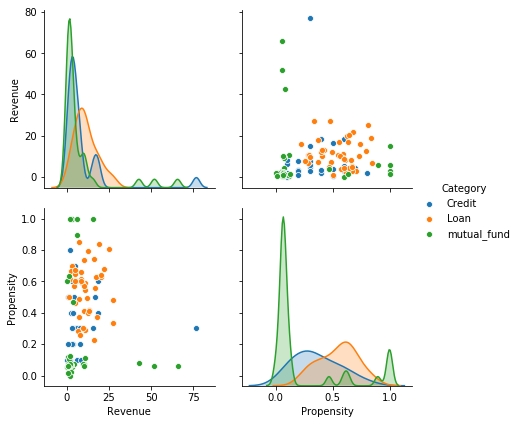

In [60]:
sns.pairplot(Consolidated_data.drop("Client", axis=1), hue="Category", size=3)
plt.show()

In [63]:
#Strategy to Maximize revenue
CallTheseClients = Consolidated_data[(Consolidated_data.Propensity>=0.60)]
CallTheseClients = CallTheseClients.sort_values(by =['Category','Propensity'],ascending=False)
CallTheseClients

,Category,Client,Revenue,Propensity
101,mutual_fund,102,2.958036,1.000000
1229,mutual_fund,1230,1.547500,0.999995
1495,mutual_fund,1496,5.771250,0.999851
41,mutual_fund,42,15.275714,0.999811
1316,mutual_fund,1317,5.987679,0.896646
910,mutual_fund,911,1.269643,0.634898
597,mutual_fund,598,0.163571,0.601549
101,Loan,102,6.952500,0.848873
774,Loan,775,19.035714,0.836224
1297,Loan,1298,25.243214,0.808870


In [64]:
Expected_Revenue = CallTheseClients.groupby(by=['Category'],as_index=False)['Revenue'].sum()
print("Expected Revenue From sale of Credit Card   = " +str(Expected_Revenue['Revenue'].iloc[0]))
print("Expected Revenue From sale of Consumer Loan = " +str(Expected_Revenue['Revenue'].iloc[1]))
print("Expected Revenue From sale of Mutual Fund   = " +str(Expected_Revenue['Revenue'].iloc[2]))

Expected Revenue From sale of Credit Card   = 32.683571431
Expected Revenue From sale of Consumer Loan = 221.583928589
Expected Revenue From sale of Mutual Fund   = 32.973392861


In [65]:
print("Combined Expected Revenue = " +str(CallTheseClients['Revenue'].sum()))

Combined Expected Revenue = 287.240892881


In [ ]:
CallTheseClients.to_csv('CallTheseClients.csv',index=False)